In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import LabelEncoder
from keras import regularizers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

import seaborn as sns
sns.set_theme(style = "darkgrid")
import matplotlib.pyplot as plt

In [ ]:
diseases = pd.read_csv(r"C:\Users\ptere\Downloads\Symptom2Disease.csv")
diseases['text'] = diseases['text'].str.strip().str.lower()
diseases['label'] = diseases['label'].str.strip().str.lower()

x = diseases['text'].values
y = diseases['label'].values

In [ ]:
vectorizer = TfidfVectorizer(
    lowercase = True,
    ngram_range = (1, 2),
    max_features = 3000,
    min_df = 2,
    token_pattern = r"(?u)\b[\w-]{2,}\b"
)

x_vect = vectorizer.fit_transform(x)


le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

x_train, x_test, y_train, y_test = train_test_split(x_vect, y_encoded, test_size = 0.2, random_state = 42, stratify = y_encoded)    

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
input_dim = x_train.shape[1]


x_train_dense = x_train.toarray().astype("float32")
x_test_dense = x_test.toarray().astype("float")

keras.utils.set_random_seed(42)


model = keras.Sequential()

model.add(layers.Input(shape = (input_dim, )))
model.add(layers.Dense(512, activation = None, kernel_regularizer = regularizers.l2(1e-5)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation = None, kernel_regularizer = regularizers.l2(1e-5)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation = "softmax"))

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "SGD",
    metrics = ["accuracy"]
)



model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 512)            │     1,536,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,832 (6.13 MB)

 Trainable params: 1,606,552 (6.13 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
history = model.fit(
    x_train_dense,
    y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 128,
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.0534 - loss: 3.5829 - val_accuracy: 0.0625 - val_loss: 3.1837
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0924 - loss: 3.2806 - val_accuracy: 0.0677 - val_loss: 3.1794
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1589 - loss: 2.9925 - val_accuracy: 0.0573 - val_loss: 3.1734
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2461 - loss: 2.6651 - val_accuracy: 0.0573 - val_loss: 3.1674
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3112 - loss: 2.4513 - val_accuracy: 0.0521 - val_loss: 3.1616
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3984 - loss: 2.2222 - val_accuracy: 0.0469 - val_loss: 3.1556
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4922 - loss: 2.0435 - val_accuracy: 0.0469 - val_loss: 3.1498
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5469 - loss: 1.8759 - val_accuracy: 0.0469 - val_loss: 3.1442

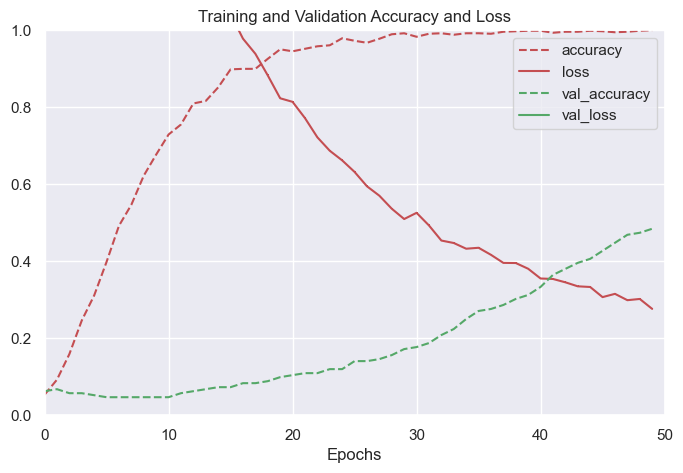

In [ ]:
pd.DataFrame(history.history).plot(
    figsize = (8, 5), xlim = [0, 50], ylim = [0, 1], grid = True,
    style = ["r--", "r-,", "g--", "g"])
plt.title("Training and Validation Accuracy and Loss")
plt.xlabel("Epochs")
plt.show()

In [ ]:
texts = ["bad cough"]
x = vectorizer.transform(texts).toarray().astype("float32")

proba = model.predict(x, verbose = 0)
pred_idx = proba.argmax(axis = 1)
pred_disease = le.inverse_transform(pred_idx)

print(f"The predicted disease is: {pred_disease[0]}")

NotFittedError: Vocabulary not fitted or provided